Objectives of the Project:-
Perform EDA on the given dataset and find insights.
Provide Useful Insights and Business recommendations that can help the business to grow.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/1.00 BUSNINESS CASE STUDY/2.00 NEXT FLIX BUSINESS CASE STUDY/netflix.CSV")

In [ ]:
display(df.head(1))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


From the above result, it is observed that only release date are numerical remaining features are categorical column.

In [ ]:
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


2. Data Cleaning

In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


From the above result it is boserved that in  2634 records , director name is missing,in 825 records cast is missing,in 831 records country is missing ,in 4 records rating is missing and in 3 records duration is missing

In [ ]:
df.duration.value_counts()

,count
duration,
1 Season,1793
2 Seasons,425
3 Seasons,199
90 min,152
94 min,146
...,...
16 min,1
186 min,1
193 min,1


From the above it is observed that instead of rating , by mistake it is it is entered duration.

In [ ]:
df[df.duration.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


Now i replace the rating entry to duration.

In [ ]:
x=df[df.duration.isna()].index

In [ ]:
df.loc[x]=df.loc[x].fillna(method='ffill',axis=1)

<ipython-input-13-8953c10d06a8>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.loc[x]=df.loc[x].fillna(method='ffill',axis=1)
<ipython-input-13-8953c10d06a8>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2017 2010 2015]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[x]=df.loc[x].fillna(method='ffill',axis=1)


In [ ]:
# replaced the wrong entries done in the rating column
df.loc[x ,'rating'] = 'Not Available'

In [ ]:
df.loc[x]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,Not Available,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,Not Available,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,Not Available,66 min,Movies,The comic puts his trademark hilarious/thought...


Now filling the Null values of rating columns

In [ ]:
df[df.rating.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [ ]:
xrating=df[df.rating.isna()].index
xrating

Index([5989, 6827, 7312, 7537], dtype='int64')

In [ ]:
df.loc[xrating,'rating']='Not Available'

In [ ]:
df.loc[xrating]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,Not Available,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,Not Available,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,Not Available,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,Not Available,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [ ]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'Not Available', 'NR', 'TV-Y7-FV', 'UR'],
      dtype=object)

Here NR (Not rated)  and UR(un rated),both are same. I am going to replace it with Not Available

In [ ]:
df.loc[df.rating =='NR','rating' ]='Not Available'
df.rating.value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [ ]:
df.loc[df.rating =='UR','rating' ]='Not Available'
df.rating.value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


Now dropping the null from date_added column

In [ ]:
df.drop(df.loc[df.date_added.isna()].index,axis =0,inplace=True)
df.date_added.value_counts()

,count
date_added,
"January 1, 2020",109
"November 1, 2019",89
"March 1, 2018",75
"December 31, 2019",74
"October 1, 2018",71
...,...
"December 4, 2016",1
"November 21, 2016",1
"November 19, 2016",1


As 'date_added' feature are in date,but it is avaliable in object format ,So i will convert it in pandas date format by using pd.to_datetime(df.column).

In [ ]:
df['date_added']=df['date_added'].str.strip().replace(r'\s+', ' ', regex=True)

In [ ]:
df['date_added']=pd.to_datetime(df['date_added'],format='%B %d, %Y')
display(df['date_added'])

,date_added
0,2021-09-25
1,2021-09-24
2,2021-09-24
3,2021-09-24
4,2021-09-24
...,...
8802,2019-11-20
8803,2019-07-01
8804,2019-11-01
8805,2020-01-11


Creating a New feature of Year  by extracting the year from 'date_added' column

In [ ]:
df['year']=df.date_added.dt.year
display(df['year'].head(2))

,year
0,2021
1,2021


Creating a New feature of Month by extracting the Month from 'date_added' column

In [ ]:
df['month']=df['date_added'].dt.month
df.month.head(2)

,month
0,9
1,9


In [ ]:
df[['date_added','year','month']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date_added  8797 non-null   datetime64[ns]
 1   year        8797 non-null   int32         
 2   month       8797 non-null   int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 206.2 KB


Percentage of  Null values in each column

In [ ]:
np.round(100*df.isna().sum()/df.shape[0],2)

,0
show_id,0.00
type,0.00
title,0.00
director,29.83
cast,9.38
country,9.44
date_added,0.00
release_year,0.00
rating,0.00
duration,0.00


3. Data Exploration and Non Graphical Analysis

In [ ]:
df.type.value_counts()

,count
type,
Movie,6131
TV Show,2666


In [ ]:
# Types of contents.
# There are two types of content one is Movie and other one is TV Show.
# there percentage are shown bellow.
np.round(100*df.type.value_counts()/df.shape[0],2)

,count
type,
Movie,69.69
TV Show,30.31


In [ ]:
movies=df.loc[df['type']=='Movie']
tv_show=df.loc[df['type']=='TV Show']

In [ ]:
movies.duration.value_counts()

,count
duration,
90 min,152
94 min,146
97 min,146
93 min,146
91 min,144
...,...
208 min,1
5 min,1
16 min,1


In [ ]:
tv_show.duration.value_counts()

,count
duration,
1 Season,1793
2 Seasons,421
3 Seasons,198
4 Seasons,94
5 Seasons,64
6 Seasons,33
7 Seasons,23
8 Seasons,17
9 Seasons,9


As movies and TV show duration are in different format. We modify the the duration for movies as minutes and TV shows in seasion in similar format .

In [ ]:
movies.duration=movies.duration.str[: -3]
movies.duration=movies.duration.astype('float')

<ipython-input-35-8ba4c2cfd728>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.duration=movies.duration.str[: -3]
<ipython-input-35-8ba4c2cfd728>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.duration=movies.duration.astype('float')


In [ ]:
movies.duration.value_counts()

,count
duration,
90.0,152
94.0,146
97.0,146
93.0,146
91.0,144
...,...
208.0,1
5.0,1
16.0,1


In [ ]:
tv_show['duration'] = tv_show.duration.str[:-7].apply(lambda x : x.strip())
tv_show['duration'] = tv_show['duration'].astype('float')


<ipython-input-38-32118498f4aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_show['duration'] = tv_show.duration.str[:-7].apply(lambda x : x.strip())
<ipython-input-38-32118498f4aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_show['duration'] = tv_show['duration'].astype('float')


In [ ]:
tv_show['duration'].head(3)

,duration
1,2.0
2,1.0
3,1.0


In [ ]:
movies.rename({'duration':'Duration in Minuts'},axis=1,inplace=True)
tv_show.rename({'duration':'Duration in Seasion'},axis=1,inplace=True)

<ipython-input-40-1909848c0b88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.rename({'duration':'Duration in Minuts'},axis=1,inplace=True)
<ipython-input-40-1909848c0b88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_show.rename({'duration':'Duration in Seasion'},axis=1,inplace=True)


In [ ]:
display(movies.head(2))

,show_id,type,title,director,cast,country,date_added,release_year,rating,Duration in Minuts,listed_in,description,year,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",2021,9
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9


In [ ]:
display(tv_show.head(1))

,show_id,type,title,director,cast,country,date_added,release_year,rating,Duration in Seasion,listed_in,description,year,month
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9


 date of first movie added on netflix and  most recent movie added on netflix as per data i.e. dataset duration

In [ ]:
movies_age=pd.DataFrame((movies.date_added.min().strftime('%B-%Y'),movies.date_added.max().strftime('%B-%Y')))
movies_age.index=['First Movies Uploaded Date','Last Movies Uploaded date']
display(movies_age)

,0
First Movies Uploaded Date,January-2008
Last Movies Uploaded date,September-2021


In [ ]:
print("First Movies Uplaoded at Netflix",movies[movies.date_added==movies.date_added.min()]['title'])


First Movies Uplaoded at Netflix 5957    To and From New York
Name: title, dtype: object


In [ ]:
print("Last Movies Uplaoded at Netflix",movies[movies.date_added==movies.date_added.max()]['title'])


Last Movies Uplaoded at Netflix 0    Dick Johnson Is Dead
Name: title, dtype: object


In [ ]:
TV_Show_age=pd.DataFrame((tv_show.date_added.min().strftime('%B-%Y'),tv_show.date_added.max().strftime('%B-%Y')))
TV_Show_age.index=['First TV_show Uploaded Date','Last TV_show Uploaded date']
display(TV_Show_age)

,0
First TV_show Uploaded Date,February-2008
Last TV_show Uploaded date,September-2021


In [ ]:
print(" TV Show Uplaoded at first year at Netflix",tv_show[tv_show.date_added==tv_show.date_added.min()]['title'])

 TV Show Uplaoded at first year at Netflix 6611    Dinner for Five
Name: title, dtype: object


In [ ]:
print("TV Show Uplaoded recently at Netflix",tv_show[tv_show.date_added==tv_show.date_added.max()]['title'])

TV Show Uplaoded recently at Netflix 1                           Blood & Water
2                               Ganglands
3                   Jailbirds New Orleans
4                            Kota Factory
5                           Midnight Mass
8           The Great British Baking Show
10    Vendetta: Truth, Lies and The Mafia
Name: title, dtype: object


 Check the number of content released in each rating.

In [ ]:
df.groupby(by=['type','rating'])['show_id'].count()

type     rating       
Movie    G                  41
         NC-17               3
         Not Available      83
         PG                287
         PG-13             490
         R                 797
         TV-14            1427
         TV-G              126
         TV-MA            2062
         TV-PG             540
         TV-Y              131
         TV-Y7             139
         TV-Y7-FV            5
TV Show  Not Available       6
         R                   2
         TV-14             730
         TV-G               94
         TV-MA            1143
         TV-PG             321
         TV-Y              175
         TV-Y7             194
         TV-Y7-FV            1
Name: show_id, dtype: int64

Find the featutres  having maximum null values(records) and the feature having comma separated multiple values for each record

In [52]:
df['country'].value_counts()

,count
country,
United States,2812
India,972
United Kingdom,418
Japan,244
South Korea,199
...,...
"Romania, Bulgaria, Hungary",1
"Uruguay, Guatemala",1
"France, Senegal, Belgium",1


From the avove result it has been observed that a movie has produces in more than one country. to analyse the data at country level it is deficult. So, we split the data on country level.
Creating a separate table for country , to avoid the duplicasy of records in our origional table after exploding.

In [53]:
country_level=df[['show_id','country','type']]
country_level.dropna(axis=0,inplace=True)

<ipython-input-53-142365a72abc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_level.dropna(axis=0,inplace=True)


In [54]:
country_level['country']=country_level['country'].apply(lambda x:x.split(','))
country_level=country_level.explode(['country'])
country_level

<ipython-input-54-f69735839d15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_level['country']=country_level['country'].apply(lambda x:x.split(','))


,show_id,country,type
0,s1,United States,Movie
1,s2,South Africa,TV Show
4,s5,India,TV Show
7,s8,United States,Movie
7,s8,Ghana,Movie
...,...,...,...
8801,s8802,Jordan,Movie
8802,s8803,United States,Movie
8804,s8805,United States,Movie
8805,s8806,United States,Movie


Removing the space from the country name

In [55]:
country_level['country']=country_level['country'].str.strip()

In [56]:
country_level=country_level[['show_id','type','country']]

Finding the list of show having blank country

In [57]:
country_level.loc[country_level['country']=='']


,show_id,type,country
193,s194,TV Show,
365,s366,Movie,
1192,s1193,Movie,
2224,s2225,Movie,
4653,s4654,Movie,
5925,s5926,Movie,
7007,s7008,Movie,


In [58]:
country_level.country.nunique()

123

Netflix have movies from 123 No country.

In [59]:
y=country_level.groupby(by=['country','type'])['show_id'].count().reset_index()
y.pivot(index='country',columns='type',values='show_id').sort_values(by='Movie',ascending=False)


type,Movie,TV Show
country,,
United States,2752.0,932.0
India,962.0,84.0
United Kingdom,534.0,271.0
Canada,319.0,126.0
France,303.0,90.0
...,...,...
Azerbaijan,NaN,1.0
Belarus,NaN,1.0
Cuba,NaN,1.0


Working on Director Columns

In [60]:
df.director.value_counts()

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Suhas Kadav,16
Jay Karas,14
...,...
"Raymie Muzquiz, Stu Livingston",1
Joe Menendez,1
Eric Bross,1


Again observed here single movies are directed by multiple director.

In [61]:
df_dir=df[['show_id','type','director']]
df_dir.dropna(inplace=True)

<ipython-input-61-a72c06894caa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dir.dropna(inplace=True)


In [62]:
df_dir['director']=df_dir['director'].apply(lambda x: x.split(','))
df_dir.head()

<ipython-input-62-a664d61f12db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dir['director']=df_dir['director'].apply(lambda x: x.split(','))


,show_id,type,director
0,s1,Movie,[Kirsten Johnson]
2,s3,TV Show,[Julien Leclercq]
5,s6,TV Show,[Mike Flanagan]
6,s7,Movie,"[Robert Cullen, José Luis Ucha]"
7,s8,Movie,[Haile Gerima]


In [63]:
df_dir=df_dir.explode('director')

In [64]:
df_dir.director=df_dir.director.str.strip()

In [65]:
df_dir[df_dir.director=='']

,show_id,type,director


In [66]:
df_dir

,show_id,type,director
0,s1,Movie,Kirsten Johnson
2,s3,TV Show,Julien Leclercq
5,s6,TV Show,Mike Flanagan
6,s7,Movie,Robert Cullen
6,s7,Movie,José Luis Ucha
...,...,...,...
8801,s8802,Movie,Majid Al Ansari
8802,s8803,Movie,David Fincher
8804,s8805,Movie,Ruben Fleischer
8805,s8806,Movie,Peter Hewitt


In [67]:
df_dir.director.nunique()

4993

Movies and TV shows directed by each director

In [68]:
xdirector=df_dir.groupby(by=['director','type'])['show_id'].count().reset_index()
xdirector.pivot(index='director',columns='type',values='show_id').sort_values(by='Movie',ascending=False)

type,Movie,TV Show
director,,
Rajiv Chilaka,22.0,NaN
Jan Suter,21.0,NaN
Raúl Campos,19.0,NaN
Suhas Kadav,16.0,NaN
Marcus Raboy,15.0,1.0
...,...,...
Vijay S. Bhanushali,NaN,1.0
Wouter Bouvijn,NaN,1.0
YC Tom Lee,NaN,1.0


Working on cast

In [69]:
df_cast=df[['show_id','type','cast']]
df_cast.dropna(inplace=True)

<ipython-input-69-4cfb05a5ab8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cast.dropna(inplace=True)


In [70]:
df_cast.value_counts()

,,,count
show_id,type,cast,
s10,Movie,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, Timothy Olyphant, Daveed Diggs, Skyler Gisondo, Laura Harrier, Rosalind Chao, Kimberly Quinn, Loretta Devine, Ravi Kapoor",1
s6257,Movie,Andy Whitfield,1
s6271,Movie,"Anne Hathaway, James McAvoy, Julie Walters, James Cromwell, Maggie Smith, Laurence Fox, Ian Richardson",1
s6270,Movie,"Hassan El Raddad, Emy Samir Ghanim, Bayyumi Fuad, Taher Abu Lela, Nesreen Ameen, Mourad Makram, Diaa El-Merghani, Juditta Salem-Wolff",1
s6269,Movie,"Herjunot Ali, Winky Wiryawan, Erly Ashy, Laura Basuki, Tarzan, Aida Nurmala, Otto Djauhari, Indra Herlambang",1
...,...,...,...
s3639,Movie,"Bea Alonzo, Jake Cuenca, Maxene Magalona, Charo Santos, Mary Joy Apostol, Gabby Padilla, Gillian Vicencio",1
s3638,Movie,"Bernat Quintana, Adrian Pang, Andrew Lua, Rachel Lascar, Fina Rius, Miranda Gas",1
s3637,TV Show,"Kelsy Abbott, Antony Del Rio, Jaylen Barron, Matt Berry, Bridget Everett, Brandon Wardell, Steve Agee, Spencer Rothbell, Nick Sumida, Ashley Boettcher, Wade Randolph",1


In [71]:
df_cast['cast']=df_cast['cast'].apply(lambda x: x.split(','))

<ipython-input-71-a7207da570b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cast['cast']=df_cast['cast'].apply(lambda x: x.split(','))


In [72]:
df_cast=df_cast.explode('cast')

In [73]:
df_cast.cast

,cast
1,Ama Qamata
1,Khosi Ngema
1,Gail Mabalane
1,Thabang Molaba
1,Dillon Windvogel
...,...
8806,Manish Chaudhary
8806,Meghna Malik
8806,Malkeet Rauni
8806,Anita Shabdish


In [74]:
df_cast.cast=df_cast.cast.str.strip()

In [75]:
df_cast[df_cast.cast=='']

,show_id,type,cast


In [76]:
df_cast.cast

,cast
1,Ama Qamata
1,Khosi Ngema
1,Gail Mabalane
1,Thabang Molaba
1,Dillon Windvogel
...,...
8806,Manish Chaudhary
8806,Meghna Malik
8806,Malkeet Rauni
8806,Anita Shabdish


In [77]:
df_cast.duplicated().sum()

2

In [78]:
df_cast.drop_duplicates()

,show_id,type,cast
1,s2,TV Show,Ama Qamata
1,s2,TV Show,Khosi Ngema
1,s2,TV Show,Gail Mabalane
1,s2,TV Show,Thabang Molaba
1,s2,TV Show,Dillon Windvogel
...,...,...,...
8806,s8807,Movie,Manish Chaudhary
8806,s8807,Movie,Meghna Malik
8806,s8807,Movie,Malkeet Rauni
8806,s8807,Movie,Anita Shabdish


In [79]:
df_cast_group=df_cast.groupby(by=['cast','type'])['show_id'].count().reset_index()
df_cast_group.pivot(index='cast',columns='type',values='show_id').sort_values(by='TV Show',ascending=False)

type,Movie,TV Show
cast,,
Takahiro Sakurai,7.0,25.0
Yuki Kaji,10.0,19.0
Junichi Suwabe,4.0,17.0
Daisuke Ono,5.0,17.0
Ai Kayano,2.0,17.0
...,...,...
Şerif Sezer,1.0,NaN
Şevket Çoruh,1.0,NaN
Şinasi Yurtsever,3.0,NaN


Visual Analysis - Univariate & Bivariate

 Distribution of content across the different types

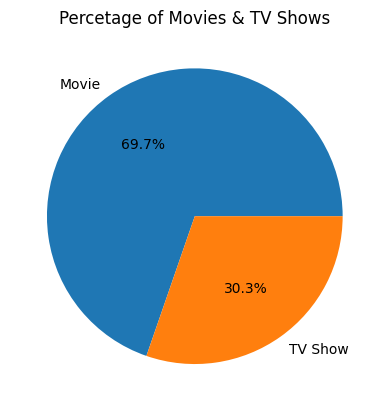

In [80]:
types=df.type.value_counts()
plt.pie(types, labels=types.index,autopct='%1.1f%%')
plt.title('Percetage of Movies & TV Shows')
plt.show()

It is observed that , around 70% content is Movies and around 30% content is TV shows.
4.2 Distribution of 'date_added' column
How has the number of movies/TV shows added on Netflix per year changed over the time?

Year Wise No of Movies and TV Shows detaisl

In [81]:
xgr=df.groupby(by=['year','type'])['show_id'].count().reset_index()
xgr.rename({'show_id' : "total movies/TV shows"},axis=1,inplace=True)
xgr.head()


,year,type,total movies/TV shows
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13


Text(0.5, 1.0, ' Year Wise No of Movies & TV Show')

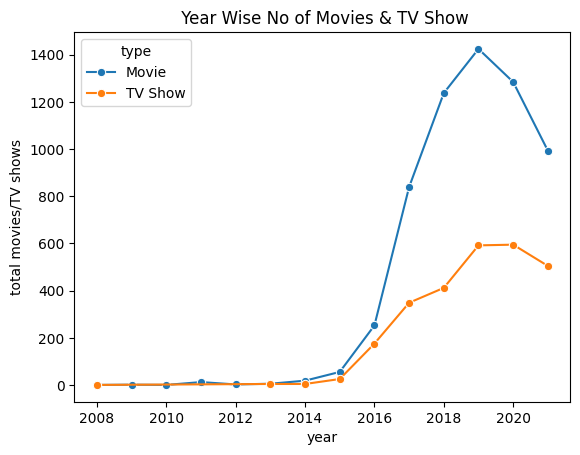

In [82]:
sns.lineplot(y=xgr['total movies/TV shows'],x=xgr['year'],hue=xgr['type'],marker='o')
plt.title(" Year Wise No of Movies & TV Show")

Observation:

From the graph it is ovserved that content increases drasticaaly at 2015.

In the year 2019, highest number of movies and TV shows added on the Netflix.

After 2019 no of content has reduced remarkable may be because of pandanamic.

# Distribution of content accordingly relaes year

In [83]:
dfrls=df.groupby(by=['release_year','type'])['show_id'].count().reset_index()
dfrls.head(2)

,release_year,type,show_id
0,1925,TV Show,1
1,1942,Movie,2


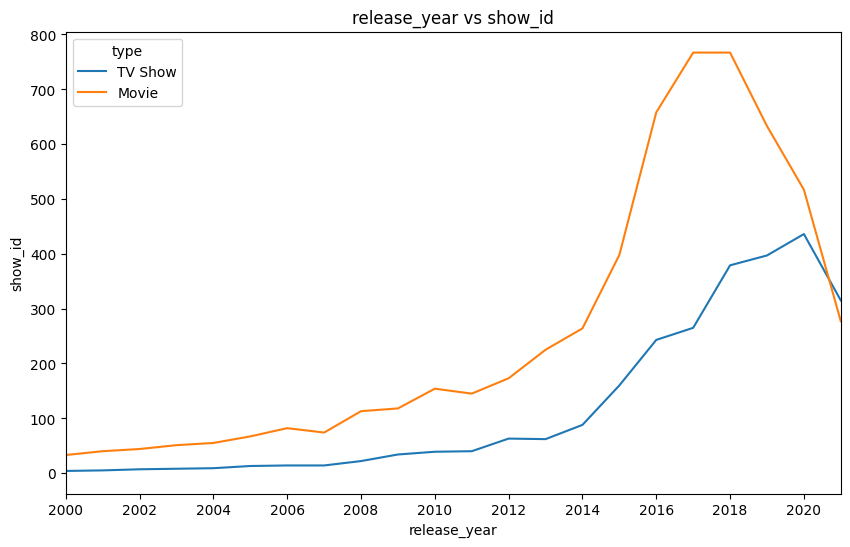

In [84]:
plt.figure(figsize=(10,6))
sns.lineplot(x=dfrls['release_year'],y=dfrls['show_id'],hue=dfrls['type'])
plt.title("release_year vs show_id")
plt.xlim( left = 2000 , right = 2021)
plt.xticks(np.arange(2000 , 2021 , 2))
plt.show()

Observation:
from grap it is shown
In year 2015 , the number of movies inceases drastically.

in year 2018 , the highest number of movie and TV show releases.

Since 2018, A drop in movies is seen and rise in TV shows is observed clearly, and TV shows surpasses the movies count in mid 2020.

In [85]:
#Director wise number of movies

In [86]:
df_dirmov=df['director'].value_counts().head(10).reset_index()
df_dirmov

,director,count
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Suhas Kadav,16
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Martin Scorsese,12
7,Youssef Chahine,12
8,Jay Chapman,12
9,Steven Spielberg,11


Text(0.5, 0, 'Movie/TV Show Count')

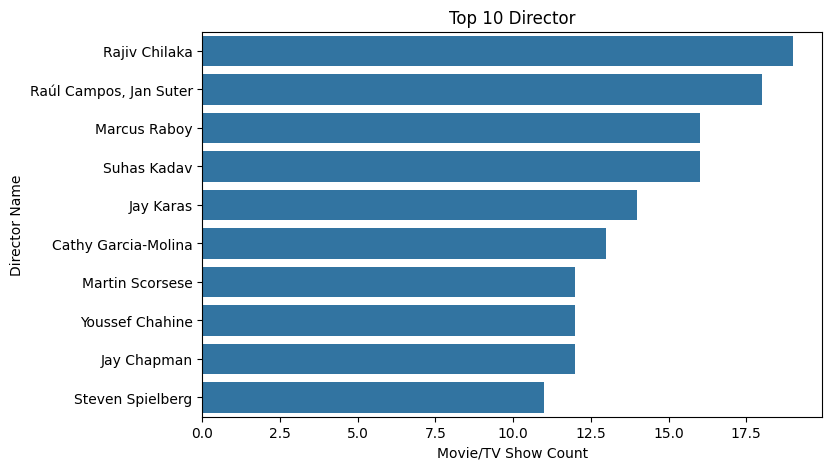

In [87]:
plt.figure(figsize=(8,5))
sns.barplot(x=df_dirmov['count'],y=df_dirmov['director'])
plt.title("Top 10 Director")
plt.ylabel("Director Name")
plt.xlabel('Movie/TV Show Count')


Observation:

Rajiv Chilaka, Jan Suter and  Raúl Campos are the top 3 directors on Netflix.

In [136]:
country_level.country.value_counts()

,count
country,
United States,3684
India,1046
United Kingdom,805
Canada,445
France,393
...,...
Ecuador,1
Armenia,1
Mongolia,1


In [137]:
top_10_country=country_level.country.value_counts().head(10).index
df_new=country_level.loc[country_level['country'].isin(top_10_country)]
df_new

,show_id,type,country,cat
0,s1,Movie,United States,Other country
4,s5,TV Show,India,India
7,s8,Movie,United States,Other country
7,s8,Movie,United Kingdom,Other country
7,s8,Movie,Germany,Other country
...,...,...,...,...
8799,s8800,Movie,India,India
8802,s8803,Movie,United States,Other country
8804,s8805,Movie,United States,Other country
8805,s8806,Movie,United States,Other country


In [138]:
df_new.head(4)

,show_id,type,country,cat
0,s1,Movie,United States,Other country
4,s5,TV Show,India,India
7,s8,Movie,United States,Other country
7,s8,Movie,United Kingdom,Other country


In [139]:
y=df_new.groupby(by=['country','type'])['show_id'].count().reset_index()
y.pivot(index='country',columns='type',values='show_id').sort_values(by='Movie',ascending=False)

type,Movie,TV Show
country,,
United States,2752,932
India,962,84
United Kingdom,534,271
Canada,319,126
France,303,90
Germany,182,44
Spain,171,61
Japan,119,198
Mexico,111,58


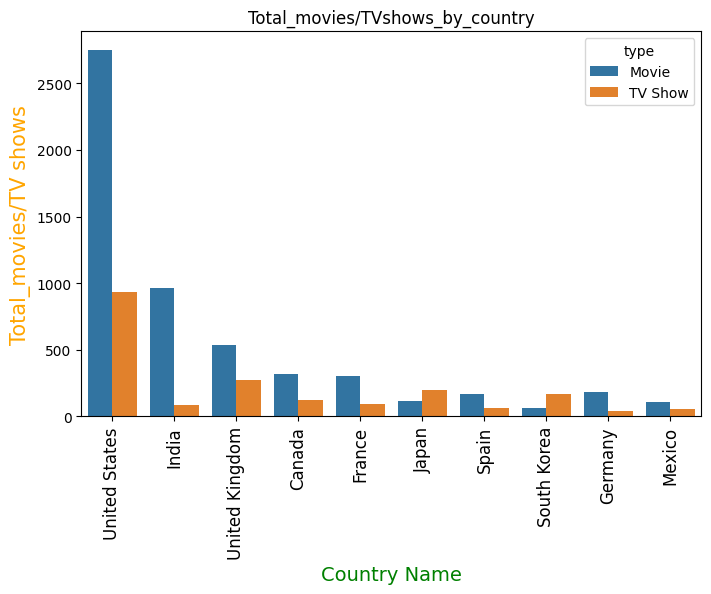

In [140]:
plt.figure(figsize= (8,5))
sns.countplot(data = df_new , x = 'country' , order = top_10_country , hue = 'type')
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('Total_movies/TV shows' ,color='orange' ,fontsize = 15)
plt.xlabel('Country Name',color='g',fontsize=14)
plt.title('Total_movies/TVshows_by_country')
plt.show()

In [141]:
top_10_country=y.country.value_counts().head(10).index
country_level['cat']=country_level['country'].apply(lambda x: x if x in top_10_country else ' Other country' )

<ipython-input-141-36b177e0839e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_level['cat']=country_level['country'].apply(lambda x: x if x in top_10_country else ' Other country' )


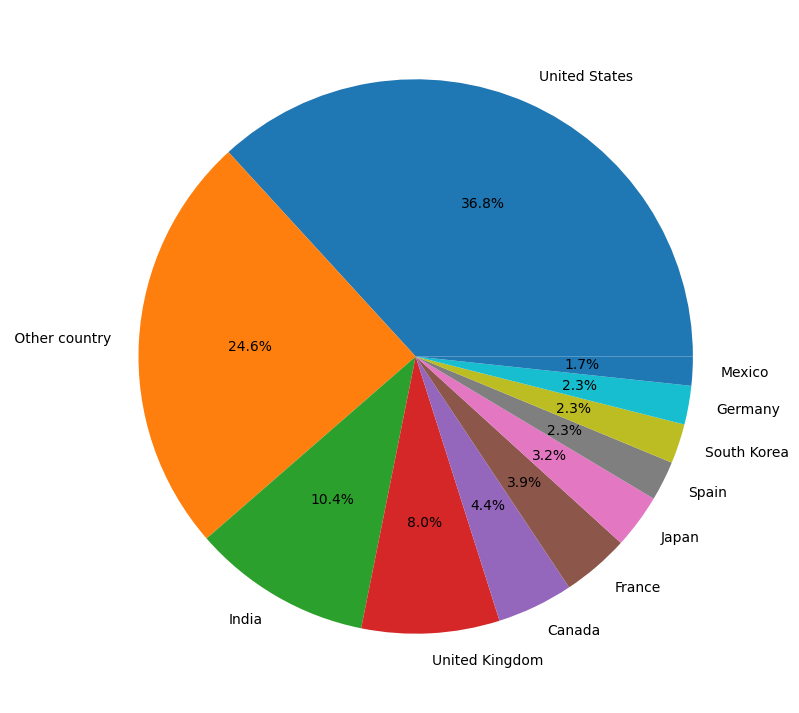

In [142]:
x=country_level.cat.value_counts()
fig=plt.figure(figsize=(10,9))
plt.pie(x,labels=x.index,autopct="%1.1f%%")
plt.show()

Observation:
From pie chart is is observed that United States is the HIGHEST contributor country on Netflix, followed by India and United Kingdom.

Maximum content of Netflix which is around 75% , is coming from these top 10 countries. Rest of the world only contributes 25% of the content.

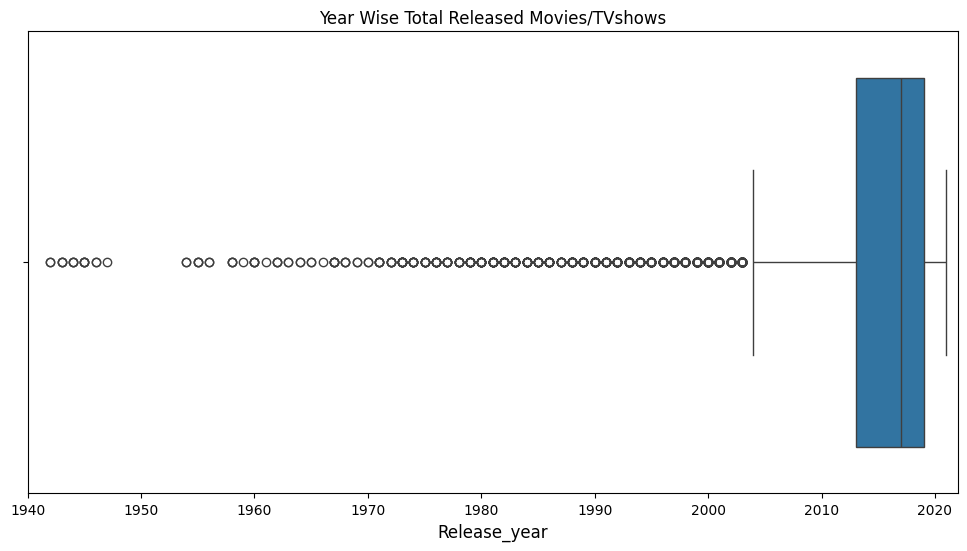

In [145]:
plt.figure(figsize= (12,6))
sns.boxplot(data = df , x = 'release_year')
plt.xlabel('Release_year' , fontsize = 12)
plt.title('Year Wise Total Released Movies/TVshows')
plt.xticks(np.arange(1940 , 2021 , 10))
plt.xlim((1940 , 2022))
plt.show()

Major content which is released in the year range 2015-2021


## Bivariate Analysis

Checking  countries are adding more number of content over the time

In [159]:
month_year = df.groupby(['year' , 'month'])['show_id'].count().reset_index()

Text(0.5, 1.0, 'Year and Month of Adding Shows on Netflix')

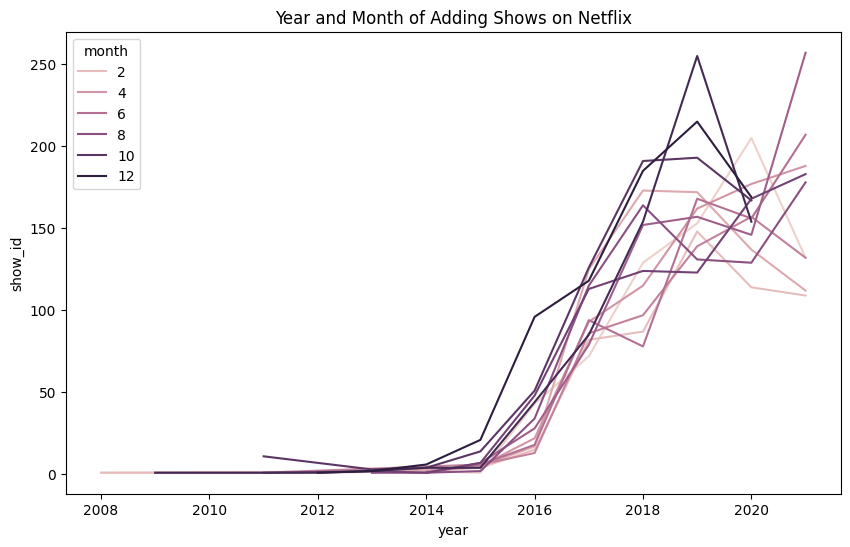

In [164]:
plt.figure(figsize = (10,6))
sns.lineplot(data=month_year, x = 'year', y = 'show_id', hue='month',color='green')
plt.title('Year and Month of Adding Shows on Netflix')

In [165]:
country_list = country_level.country.value_counts().head(15).index
top_15_country = country_level.loc[country_level['country'].isin(country_list)]
country_year = top_15_country.merge(df , on = 'show_id')[['show_id','country_x' ,'type_x' , 'year' ]]
country_year.columns = ['show_id', 'country', 'type', 'year']

In [167]:
country_year = country_year.groupby(['country' , 'year'])['show_id'].count().reset_index()

<Axes: xlabel='year', ylabel='show_id'>

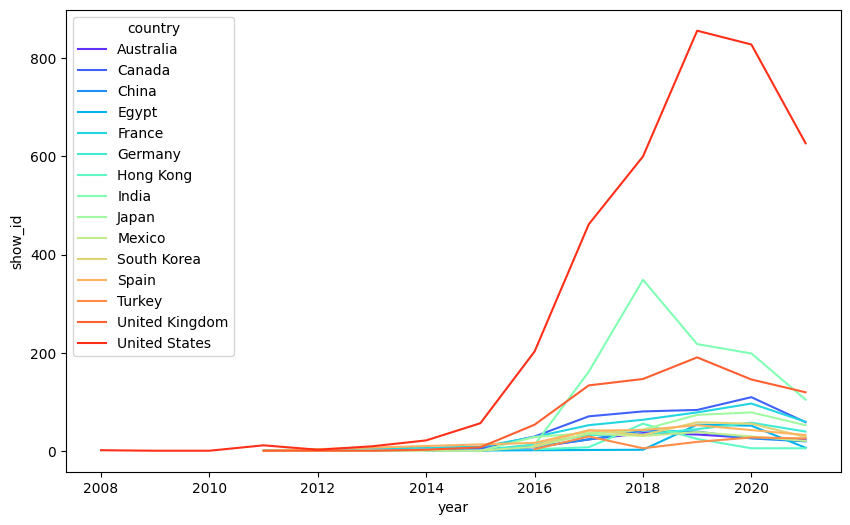

In [168]:
plt.figure(figsize = (10,6))
sns.lineplot(data = country_year , x = 'year' , y = 'show_id' , hue = 'country' , palette ='rainbow' )

Observation :
United Stated have always added highset number of movies/TV shows over the time.
Since 2016, India has seen spike in popularity of content and added more number of content, followed by United Kingdom at 3rd position.

** Insights based on Non-Graphical and Visual Analysis**
Around 70% content on Netflix is Movies and around 30% content is TV shows.

The movies and TV shows uploading on the Netflix started from the year 2008, It had very lesser content till 2014.

Year 2015 marks the drastic surge in the content getting uploaded on Netflix.
It continues the uptrend since then and 2019 marks the highest number of movies and TV shows added on the Netflix.
Year 2020 and 2021 has seen the drop in content added on Netflix, possibly because of Pandemic. But still , TV shows content have not dropped as drastic as movies.
Since 2018, A drop in the movies is seen , but rise in TV shows is observed clearly. Being in continuous uptrend , TV shows surpassed the movies count in mid 2020. It shows the rise in popularity of tv shows in recent years.

Netflix has movies from variety of directors. Around 4993 directors have their movies or tv shows on Netflix.

Netflix has movies from total 122 countries, United States being the highset contributor with almost 37% of all the content.

The release year for shows is concentrated in the range 2005-2021.
50 mins - 150 mins is the range of movie durations, excluding potential outliers.

Content in most of the ratings is available in lesser quanitity except in US. Ratings like TV-Y7 , TV-Y7 FV , PG ,TV-G , G , TV-Y , TV-PG are very less avaialble in all countries except US.

Shorter duration movies have been popular in last 10 years.

**Business Insights**
Netflix have majority of content which is released after the year 2000. It is observed that the content older than year 2000 is very scarce on Netflix.

Senior Citizen could be the target audience for such content, which is almost missing currently.

Maximum content (more than 80%) is
TV-MA - Content intended for mature audiences aged 17 and above.
TV-14 - Content suitable for viewers aged 14 and above.
TV-PG - Parental guidance suggested (similar ratings - PG-13 , PG)
R - Restricted Content, that may not be suitable for viewers under age 17.
These ratings' movies target Matured and Adult audience. Rest 20 % of the content is for kids aged below 13. It shows that Netflix is currently serving mostly Mature audiences or Children with parental guidance.

drop in content is seen across all the countries and type of content in year 2020 and 2021, possibly because of Pandemic.

**Recommendations**

Country specific insights -
    The content need to be targetting the demographic of any country. Netflix can produce higher number of content in the perticular rating as per demographic of the country. Eg.
    The country like India , which is highly populous , has maximum content available only in three rating TV-MA, TV-14 , TV-PG. It is unlikely to serve below 14 age and above 35 year age group .